In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Loan_Prediction.csv')  
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df=df.drop(['Loan_ID'],axis=1) 
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df = df.dropna()
df = df.reset_index(drop=True)
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
475,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df.isnull().sum() 

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 45.1+ KB


In [12]:
print(df['Gender'].unique())                             
print(df['Married'].unique()) 
print(df['Dependents'].unique()) 
print(df['Education'].unique())                     
print(df['Self_Employed'].unique())                
print(df['Property_Area'].unique())        
print(df['Loan_Status'].unique())      
print(df['Credit_History'].unique())      

['Male' 'Female']
['Yes' 'No']
['1' '0' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Rural' 'Urban' 'Semiurban']
['N' 'Y']
[1. 0.]


In [14]:
from sklearn.preprocessing import LabelEncoder          
lb=LabelEncoder()

df['Gender']=pd.DataFrame(lb.fit_transform(df['Gender']))
df['Married']=pd.DataFrame(lb.fit_transform(df['Married']))
df['Dependents']=pd.DataFrame(lb.fit_transform(df['Dependents']))
df['Education']=pd.DataFrame(lb.fit_transform(df['Education']))
df['Self_Employed']=pd.DataFrame(lb.fit_transform(df['Self_Employed']))
df['Property_Area']=pd.DataFrame(lb.fit_transform(df['Property_Area'])) 
df['Loan_Status']=pd.DataFrame(lb.fit_transform(df['Loan_Status']))
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
476,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
477,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
478,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [15]:
collist=df.columns.values
ncol=11
nrows=10 

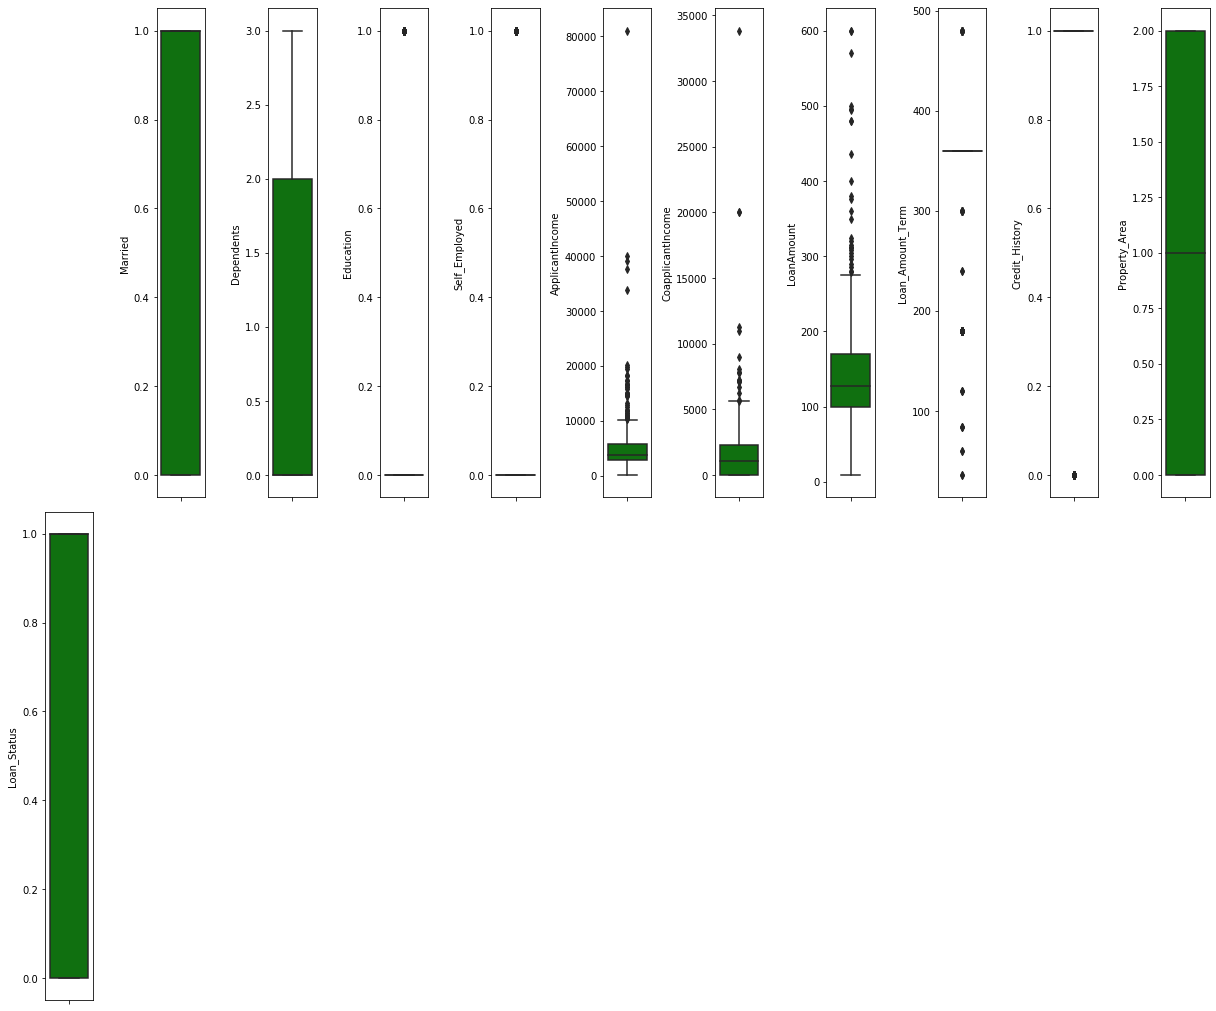

In [16]:
plt.figure(figsize=(17,70))           # Almost there are no Outliers (I am neglecting those as already due to missing values I have decreased 200 rows to 147 rows  )
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1) 
    sns.boxplot(df[collist[i]],color='green',orient='v') 
    plt.tight_layout()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 45.1 KB


In [19]:
df.skew()

Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

In [20]:
zscore(df)
z=np.abs(zscore(df))                                                 # Removing outliers
np.where(z>3)      
df1=df[(z<3).all(axis=1)] 
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
476,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
477,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
478,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [21]:
df1 = df1.reset_index(drop=True)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
447,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
448,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
449,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
450,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [28]:
import numpy as np                                            # Removing Skewness 
for col in df1.columns:
    if df1.skew().loc[col]>0.55: 
        df1[col]=np.sqrt(np.sqrt(np.sqrt(df1[col])))

In [29]:
df1.skew()

Gender              -1.658936
Married             -0.602600
Dependents           0.517580
Education            1.443921
Self_Employed        2.200742
ApplicantIncome     -0.596923
CoapplicantIncome   -0.214155
LoanAmount          -1.324226
Loan_Amount_Term    -2.010659
Credit_History      -1.986572
Property_Area       -0.038700
Loan_Status         -0.871173
dtype: float64

In [31]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0.526589,0.000000,0.000000,2.243931,2.118566,1.768118,360.0,1.0,0,0
1,1,1,0.000000,0.000000,0.980158,2.197969,0.000000,1.649561,360.0,1.0,2,1
2,1,1,0.000000,0.980158,0.000000,2.181219,2.170880,1.757132,360.0,1.0,2,1
3,1,0,0.000000,0.000000,0.000000,2.272093,0.000000,1.784370,360.0,1.0,2,1
4,1,1,0.741276,0.000000,0.980158,2.261501,2.234534,1.885703,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
447,0,0,0.000000,0.000000,0.000000,2.194199,0.000000,1.663294,360.0,1.0,0,1
448,1,1,0.869742,0.000000,0.000000,2.232211,0.000000,1.550446,180.0,1.0,0,1
449,1,1,0.526589,0.000000,0.000000,2.302213,1.869461,1.877529,360.0,1.0,2,1
450,1,1,0.741276,0.000000,0.000000,2.295943,0.000000,1.830410,360.0,1.0,2,1


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             452 non-null    int64  
 1   Married            452 non-null    int64  
 2   Dependents         452 non-null    float64
 3   Education          452 non-null    float64
 4   Self_Employed      452 non-null    float64
 5   ApplicantIncome    452 non-null    float64
 6   CoapplicantIncome  452 non-null    float64
 7   LoanAmount         452 non-null    float64
 8   Loan_Amount_Term   452 non-null    float64
 9   Credit_History     452 non-null    float64
 10  Property_Area      452 non-null    int64  
 11  Loan_Status        452 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 42.5 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A13D56FB08>,
      dtype=object)

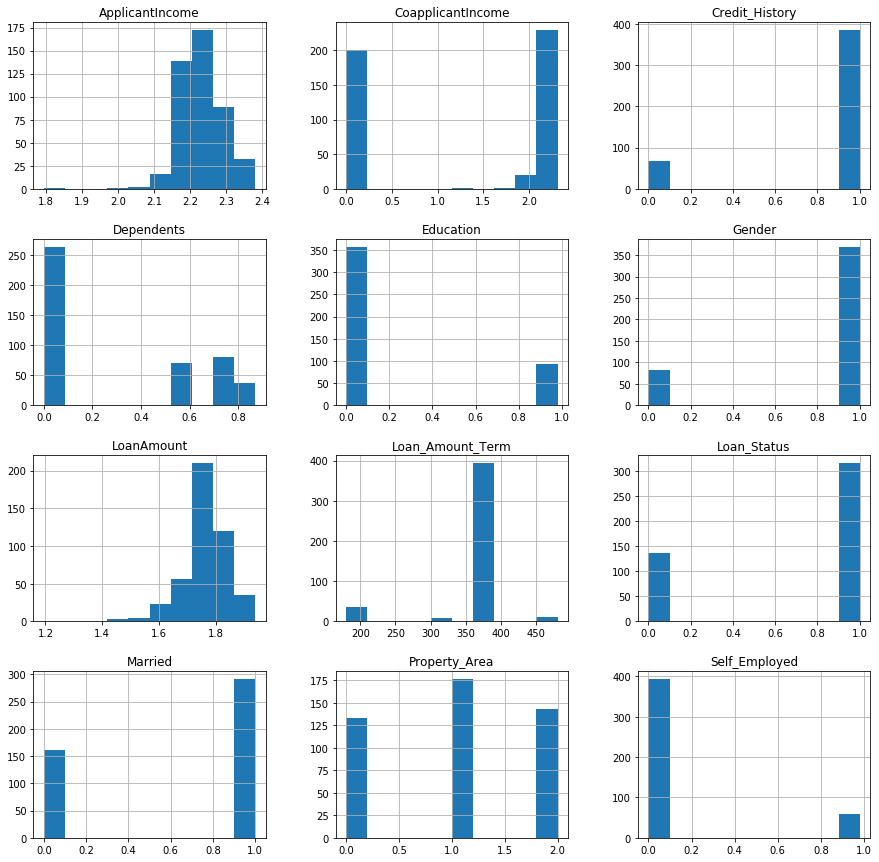

In [33]:
df1.hist(figsize=(15,15))   

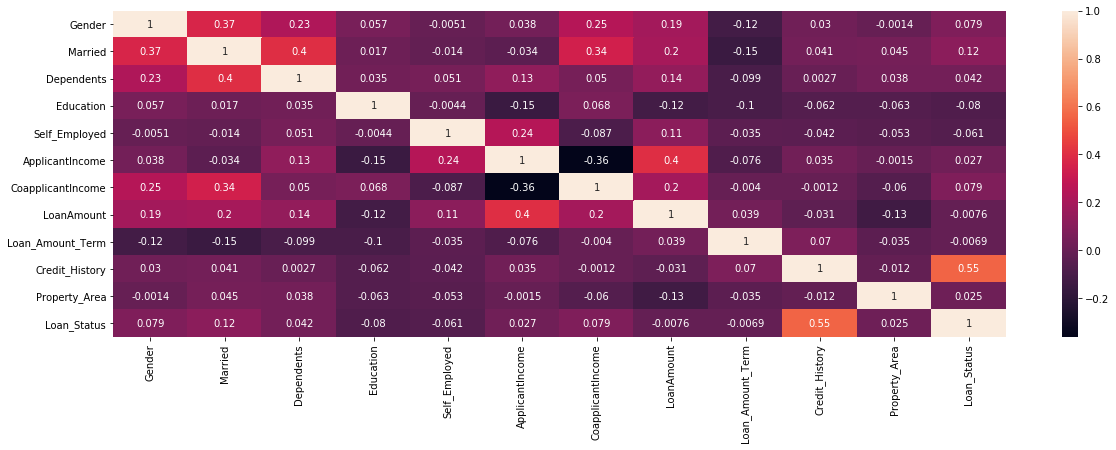

In [128]:
plt.figure(figsize=(20,6))                       # Here Credit_History & Marital Status is more important for Loan approval
sns.heatmap(df1.corr(),annot=True) 

# Univariate Analysis

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a141299a48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a14123ff48>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a141299f48>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a141299f08>}

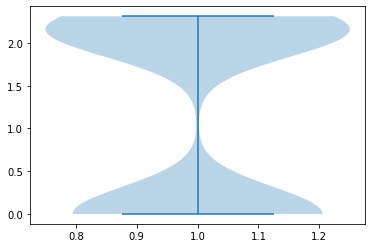

In [149]:
plt.violinplot(df1['CoapplicantIncome']) 

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a14130c0c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a141299a08>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a14130c348>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a141311808>}

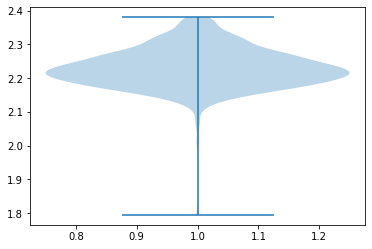

In [150]:
plt.violinplot(df1['ApplicantIncome']) 

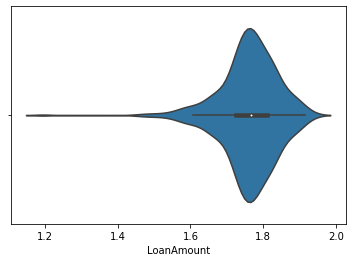

In [151]:
sns.violinplot(df1['LoanAmount']) 

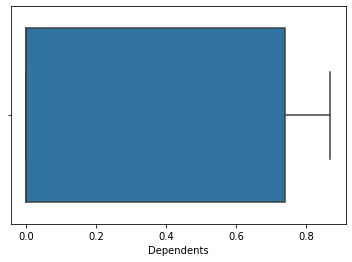

In [155]:
sns.boxplot(df1['Dependents']) 

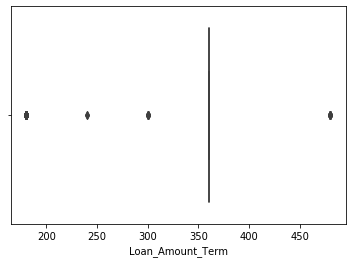

In [166]:
sns.boxplot(df1['Loan_Amount_Term']) 

# Bivariate Analysis

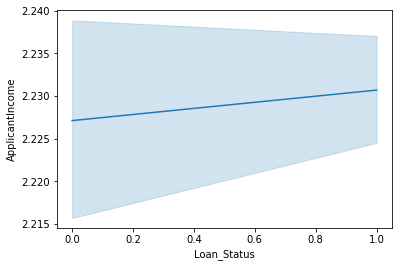

In [158]:
sns.lineplot(x='Loan_Status', y='ApplicantIncome', data=df1) 

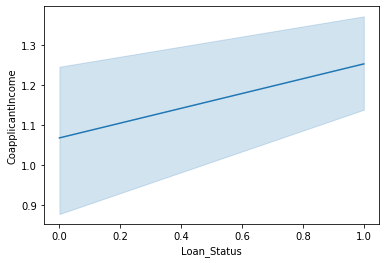

In [160]:
sns.lineplot(x='Loan_Status', y='CoapplicantIncome', data=df1) 

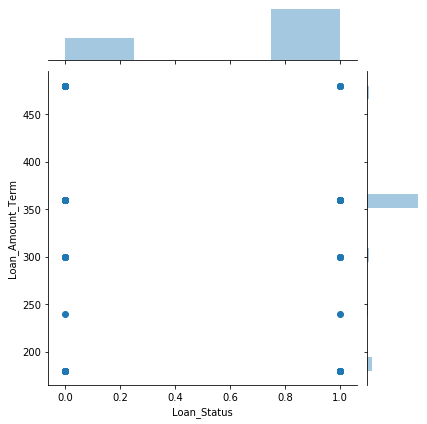

In [162]:
sns.jointplot(x='Loan_Status', y='Loan_Amount_Term', data=df1) 

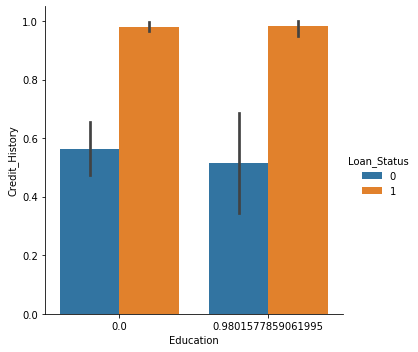

In [168]:
sns.catplot(x='Education',y='Credit_History',hue='Loan_Status',data=df1, kind='bar') # here first category in Education is Graduate and second is not graduate

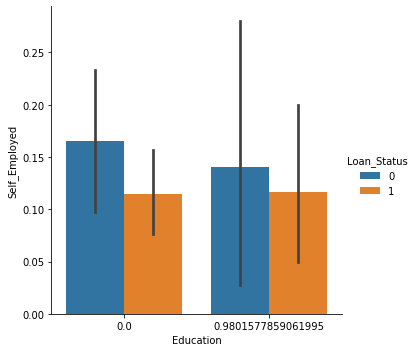

In [170]:
sns.catplot(x='Education',y='Self_Employed',hue='Loan_Status',data=df1, kind='bar')  # here first category in Education is Graduate and second is not graduate

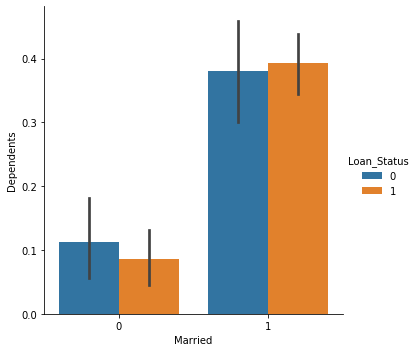

In [173]:
sns.catplot(x='Married',y='Dependents',hue='Loan_Status',data=df1, kind='bar')  # Here first category in Marital Status is not married and second category is married

# Splitting data into target and input variables

In [34]:
df_x=df1.drop('Loan_Status',axis=1)
df_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0.526589,0.000000,0.000000,2.243931,2.118566,1.768118,360.0,1.0,0
1,1,1,0.000000,0.000000,0.980158,2.197969,0.000000,1.649561,360.0,1.0,2
2,1,1,0.000000,0.980158,0.000000,2.181219,2.170880,1.757132,360.0,1.0,2
3,1,0,0.000000,0.000000,0.000000,2.272093,0.000000,1.784370,360.0,1.0,2
4,1,1,0.741276,0.000000,0.980158,2.261501,2.234534,1.885703,360.0,1.0,2


In [38]:
y=pd.DataFrame(df1.Loan_Status)
y.head() 

,Loan_Status
0,0
1,1
2,1
3,1
4,1


In [39]:
print(y['Loan_Status'].unique())       

[0 1]


In [40]:
print(df_x.shape)
print(y.shape) 

(452, 11)
(452, 1)


In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns) 

In [42]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.470767,0.743818,0.692924,-0.512416,-0.387463,0.239182,0.857700,0.096942,0.232882,0.417164,-1.308556
1,0.470767,0.743818,-0.818132,-0.512416,2.580895,-0.528953,-1.115579,-1.382429,0.232882,0.417164,1.251909
2,0.470767,0.743818,-0.818132,1.951541,-0.387463,-0.808889,0.906425,-0.040139,0.232882,0.417164,1.251909
3,0.470767,-1.344416,-0.818132,-0.512416,-0.387463,0.709841,-1.115579,0.299743,0.232882,0.417164,1.251909
4,0.470767,0.743818,1.308973,-0.512416,2.580895,0.532819,0.965714,1.564191,0.232882,0.417164,1.251909
...,...,...,...,...,...,...,...,...,...,...,...
447,-2.124193,-1.344416,-0.818132,-0.512416,-0.387463,-0.591957,-1.115579,-1.211056,0.232882,0.417164,-1.308556
448,0.470767,0.743818,1.677606,-0.512416,-0.387463,0.043311,-1.115579,-2.619195,-3.126560,0.417164,-1.308556
449,0.470767,0.743818,0.692924,-0.512416,-0.387463,1.213220,0.625677,1.462199,0.232882,0.417164,1.251909
450,0.470767,0.743818,1.308973,-0.512416,-0.387463,1.108426,-1.115579,0.874233,0.232882,0.417164,1.251909


In [43]:
y

,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
447,1
448,1
449,1
450,1


In [44]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [132]:
# as I got the highest accuracy score with respect to random state 80 in KNeighborsClassifier, so I fix the random state 80 for all the Models 
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=80,test_size=0.20) 

In [136]:
print(train_x.shape,test_x.shape)

(361, 11) (91, 11)


In [137]:
print(train_y.shape,test_y.shape)

(361, 1) (91, 1)


In [133]:
def max_accuracy_score(clf,x,y):
    max_acc_score=0
    for r_state in range(42,100):
        train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        clf.fit(train_x,train_y)
        y_pred = clf.predict(test_x) 
        acc_scr=accuracy_score(test_y,pre)
        print("accuracy score corresponding to random state ",r_state,"is",acc_scr)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state,"is",max_acc_score)
    return final_r_state  

In [130]:
kn=KNeighborsClassifier(n_neighbors=15) 
r_state=max_accuracy_score(kn,x,y) 

accuracy score corresponding to random state  42 is 0.6263736263736264
accuracy score corresponding to random state  43 is 0.6593406593406593
accuracy score corresponding to random state  44 is 0.6153846153846154
accuracy score corresponding to random state  45 is 0.6153846153846154
accuracy score corresponding to random state  46 is 0.5824175824175825
accuracy score corresponding to random state  47 is 0.5604395604395604
accuracy score corresponding to random state  48 is 0.6373626373626373
accuracy score corresponding to random state  49 is 0.6373626373626373
accuracy score corresponding to random state  50 is 0.6593406593406593
accuracy score corresponding to random state  51 is 0.5824175824175825
accuracy score corresponding to random state  52 is 0.6483516483516484
accuracy score corresponding to random state  53 is 0.6593406593406593
accuracy score corresponding to random state  54 is 0.7252747252747253
accuracy score corresponding to random state  55 is 0.6813186813186813
accura



Model name - KNeighborsClassifier



Accuracy_score =  0.8351648351648352


Cross_Val_Score =  0.7830917874396135


classification_report
               precision    recall  f1-score   support

           0       0.79      0.58      0.67        26
           1       0.85      0.94      0.89        65

    accuracy                           0.84        91
   macro avg       0.82      0.76      0.78        91
weighted avg       0.83      0.84      0.83        91



confusion matrix
 [[15 11]
 [ 4 61]]


roc_auc_score =  0.7576923076923077


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

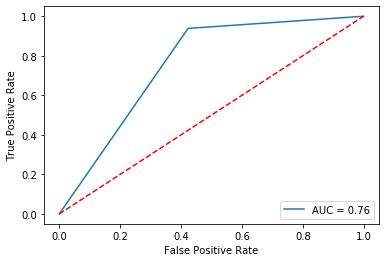

In [138]:
print('\n')
print('Model name - KNeighborsClassifier\n')
print('\n')
kn=KNeighborsClassifier(n_neighbors=6)  
kn.fit(train_x,train_y) 
pre=kn.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(kn, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - SupportVectorClassifier



Accuracy_score=  0.8131868131868132


Cross_Val_Score =  0.7674879227053141


classification_report
               precision    recall  f1-score   support

           0       0.71      0.58      0.64        26
           1       0.84      0.91      0.87        65

    accuracy                           0.81        91
   macro avg       0.78      0.74      0.76        91
weighted avg       0.81      0.81      0.81        91



confusion matrix
 [[15 11]
 [ 6 59]]


roc_auc_score =  0.7423076923076922


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

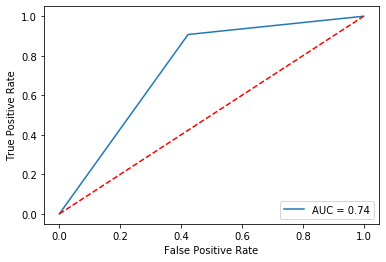

In [139]:
print('\n')
print('Model name - SupportVectorClassifier\n')
print('\n')
sv=SVC(C=10,kernel='rbf') 
sv.fit(train_x,train_y)
pre=sv.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS) 
print('\n')
sc = cross_val_score(sv, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - DecisionTreeClassifier



Accuracy_score=  0.7912087912087912


Cross_Val_Score =  0.6859903381642513


classification_report
               precision    recall  f1-score   support

           0       0.64      0.62      0.63        26
           1       0.85      0.86      0.85        65

    accuracy                           0.79        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.79      0.79      0.79        91



confusion matrix
 [[16 10]
 [ 9 56]]


roc_auc_score =  0.7384615384615385


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

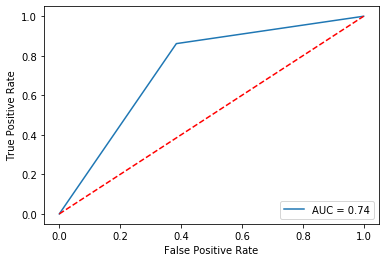

In [140]:
print('\n')
print('Model name - DecisionTreeClassifier\n')
print('\n')
dt=DecisionTreeClassifier(criterion='gini') 
dt.fit(train_x,train_y)
pre=dt.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)  
print('\n')
sc = cross_val_score(dt, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - RandomForestClassifier



Accuracy_score=  0.8571428571428571


Cross_Val_Score =  0.8053140096618356


classification_report
               precision    recall  f1-score   support

           0       0.84      0.62      0.71        26
           1       0.86      0.95      0.91        65

    accuracy                           0.86        91
   macro avg       0.85      0.78      0.81        91
weighted avg       0.86      0.86      0.85        91



confusion matrix
 [[16 10]
 [ 3 62]]


roc_auc_score =  0.7846153846153847


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

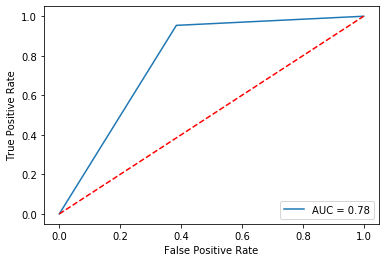

In [141]:
print('\n')
print('Model name - RandomForestClassifier\n')
print('\n')
rfc=RandomForestClassifier(criterion='gini',n_estimators=1000) 
rfc.fit(train_x,train_y) 
pre=rfc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(rfc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GradientBoostingClassifier



Accuracy_score=  0.8241758241758241


Cross_Val_Score =  0.8119806763285023


classification_report
               precision    recall  f1-score   support

           0       0.81      0.50      0.62        26
           1       0.83      0.95      0.89        65

    accuracy                           0.82        91
   macro avg       0.82      0.73      0.75        91
weighted avg       0.82      0.82      0.81        91



confusion matrix
 [[13 13]
 [ 3 62]]


roc_auc_score =  0.726923076923077


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

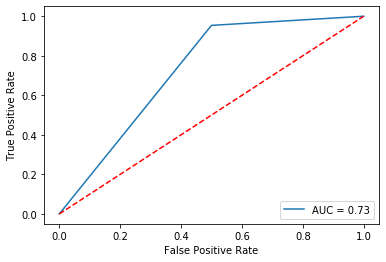

In [142]:
print('\n')
print('Model name - GradientBoostingClassifier\n')
print('\n')
gbc=GradientBoostingClassifier(learning_rate=0.001, n_estimators=900) 
gbc.fit(train_x,train_y)
pre=gbc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(gbc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - Logistic Regression



Accuracy_score=  0.8351648351648352


Cross_Val_Score =  0.8208212560386473


classification_report
               precision    recall  f1-score   support

           0       0.87      0.50      0.63        26
           1       0.83      0.97      0.89        65

    accuracy                           0.84        91
   macro avg       0.85      0.73      0.76        91
weighted avg       0.84      0.84      0.82        91



confusion matrix
 [[13 13]
 [ 2 63]]


roc_auc_score =  0.7346153846153847


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

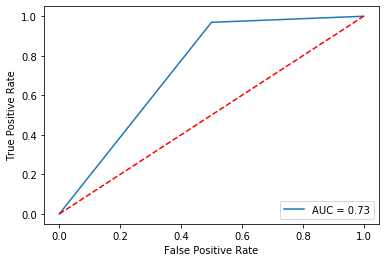

In [143]:
print('\n')
print('Model name - Logistic Regression\n')
print('\n')
lor=LogisticRegression(penalty='l2', C=15, fit_intercept=True)
lor.fit(train_x,train_y)
pre=lor.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(lor, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - AdaBoost Classifier



Accuracy_score=  0.7802197802197802


Cross_Val_Score =  0.6993236714975846


classification_report
               precision    recall  f1-score   support

           0       0.62      0.62      0.62        26
           1       0.85      0.85      0.85        65

    accuracy                           0.78        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.78      0.78      0.78        91



confusion matrix
 [[16 10]
 [10 55]]


roc_auc_score =  0.7307692307692308


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

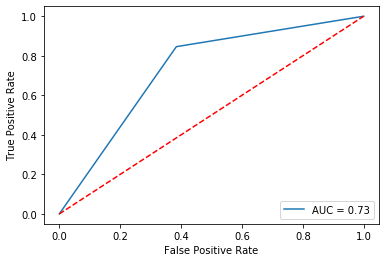

In [146]:
print('\n')
print('Model name - AdaBoost Classifier\n')
print('\n')
adc=AdaBoostClassifier(base_estimator=dt,learning_rate=0.01,n_estimators=10,algorithm='SAMME')
adc.fit(train_x,train_y)
pre=adc.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(adc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - XGBoost Classifier



Accuracy_score=  0.7802197802197802


Cross_Val_Score =  0.7810628019323671


classification_report
               precision    recall  f1-score   support

           0       0.62      0.58      0.60        26
           1       0.84      0.86      0.85        65

    accuracy                           0.78        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.78      0.78      0.78        91



confusion matrix
 [[15 11]
 [ 9 56]]


roc_auc_score =  0.7192307692307691


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

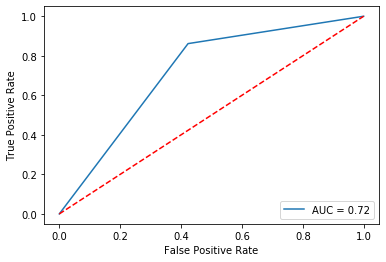

In [147]:
print('\n')
print('Model name - XGBoost Classifier\n')
print('\n')
xgb=XGBClassifier(alpha=1, max_depth=6)
xgb.fit(train_x,train_y)
pre=xgb.predict(test_x) 
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(xgb, x, y, cv=10, scoring='accuracy').mean() 
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GaussianNB



Accuracy_score =  0.8351648351648352


Cross_Val_Score =  0.8052657004830918


classification_report
               precision    recall  f1-score   support

           0       0.87      0.50      0.63        26
           1       0.83      0.97      0.89        65

    accuracy                           0.84        91
   macro avg       0.85      0.73      0.76        91
weighted avg       0.84      0.84      0.82        91



confusion matrix
 [[13 13]
 [ 2 63]]


roc_auc_score =  0.7346153846153847


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

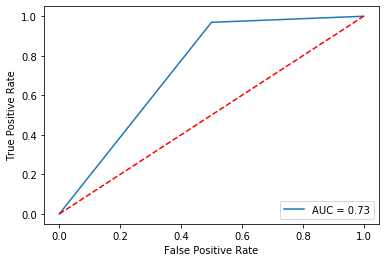

In [148]:
print('\n')
print('Model name - GaussianNB\n')
print('\n')
gnb=GaussianNB()
gnb.fit(train_x,train_y)
pre=gnb.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(gnb, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n') 
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate')

In [174]:
# Here RandomForestClassifier is working best with an Accuracy Score of 0.8571428571428571 so I am saving the Model
from sklearn.externals import joblib
joblib.dump(rfc, 'RandomForestClassifier_Loan_Prediction.pkl')  

['RandomForestClassifier_Loan_Prediction.pkl']